# <center>L2 Computational Physics</center>
---
## Week 4: Differential Equations II

In this notebook, you will write a program to study the trajectory of a spherical, iron cannonball in the presence of gravity and drag forces. 

In [5]:
import numpy
from matplotlib import pyplot as plt

In [39]:
# Define all constants to be used in the simulation
r_cb = 0.15  # Radius of cannonball in m
rho_iron = 7874  # Density of iron in kg/m^3
g = 9.81  # Acceleration due to gravity in m/s^2
kappa = 0.47  # Drag coefficient of a sphere
rho_air = 1.23  # Density of air in kg/m^3
v0 = 125.00  # Initial speed in m/s

From this information, calculate the following two variables:

In [35]:
def get_area(r):
    ''' 
    This function returns the cross section area of a sphere of radius r. The returned 
    value is in the squared units of the unit of the radius argument.
    '''
    # YOUR CODE HERE
    return (r**2)*numpy.pi

def get_mass(r):
    ''' 
    This function returns the mass of an iron sphere of radius r. The radius 
    should be given in meter and the return value is in kg.
    '''
    # YOUR CODE HERE
    return 4*numpy.pi*rho_iron*r**3/3

area_cb = get_area(r_cb)
mass_cb = get_mass(r_cb)

In [21]:
# these tests are worth one mark
assert numpy.isclose(area_cb, 0.07068583470577035)
assert numpy.isclose(mass_cb, 111.31605249464711)

## The Differential Equations

Create a function `f` which calculates the right-hand side of the differential equation

$$ \frac{d}{dt}\left(\begin{array}{c}x\\y\\v_x \\v_y \end{array}\right) = f(x, y, v_x, v_y, t)$$

such that the differential equation represents the cannonball's motion as it moves through the air. 

- *Your function should accept two arguments:*
    - `r` *- a numpy array representing the cannonball's state, $(x, y, v_{x}, v_{y})$.*
    - `t` *- Time * 
    
- *The drag force experienced by the cannonball is given by $$\vec{F}_{\textrm{d}} = - \frac{1}{2} C_{\textrm{d}} \rho |\vec{v}|^{2} A \widehat{v}~,$$ where $\widehat{v}$ is a unit vector pointing in the direction of the cannonball's instantaneous velocity.*

In [50]:
def f(r, t):
    '''Implements differential equation for cannonball from state vector r and time t'''
    
    # Unpack array of the state
    x, y, vx, vy = r
    
    # these variables should updated in your code to be the derivatives of 
    # the x, y positions and the derivative of the x, y velocities. 
    v = (vx**2 + vy**2)**0.5
    dx_dt, dy_dt, dvx_dt, dvy_dt = vx, vy, -0.5*kappa*rho_air*(v**2)*get_area(r_cb)*(1/get_mass(r_cb))*vx/v, -g - 0.5*kappa*rho_air*(v**2)*get_area(r_cb)*(1/get_mass(r_cb))*vy/v
    
    # YOUR CODE HERE
    return numpy.array([dx_dt, dy_dt, dvx_dt, dvy_dt])
    

Check your result:

In [49]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert len(f(r_test, 0))== 4

[88.38834764831843, 88.38834764831843, -0.246028958003168, 9.563971041996833]


In [86]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(f(r_test, 0), [ 88.38834765,  88.38834765,  -2.0279283 , -11.8379283 ]).all()

[88.38834764831843, 88.38834764831843, -2.0279282994464727, -11.837928299446473]


## Solving the Differential Equations

Create the function `solve_euler(state_initial, t1, n_panels)` which solves the differential equations using Euler's method.

- `state_initial` *is a numpy array containing the initial conditions $(x_{0}, y_{0}, v_{x0}, v_{y0})$*
- *When working with a numpy array, you can use the same commands as those used for single variables - for instance,* `state += f(state, t)`.
- *This function should record all state values at each timepoint in the variable `history` and return it. This will be similar to last week, only this time you will have to populate a 2D array.* 


In [56]:
def solve_euler(state_initial, t1, n_steps):
    '''Solves ODE using Euler's method from state_initial to end time t1 using n_panels panels'''
    # Define array for trajectory history
    history = numpy.empty((n_steps+1,4))  # Number of columns is equal to number of variables to solve for (4)
    history[0] = state_initial
    # you should now populate the history array
    # YOUR CODE HERE
    dt = t1/n_steps
    for i in range(0, n_steps):
        test = f(history[i], dt*i)
        temp = [0,0,0,0]
        temp[0] += history[i][0] + dt*history[i][2]
        temp[1] += history[i][1] + dt*history[i][3]
        temp[2] += history[i][2] + dt*test[2]
        temp[3] += history[i][3] + dt*test[3]
        history[i+1] = temp
    print(history)
    return history


Test your solution:

In [57]:
# this test is worth 4 marks
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(solve_euler(r_test, 25.0, 10), numpy.array(
    [[   0.        ,    0.        ,   88.38834765,   88.38834765],
     [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
     [ 429.26718637,  367.95468637,   79.41984538,   31.51743125],
     [ 627.81679983,  446.7482645 ,   76.30595276,    5.75669607],
     [ 818.58168171,  461.14000469,   73.62655732,  -18.97044366],
     [1002.64807501,  413.71389553,   71.05785323,  -42.83359748],
     [1180.2927081 ,  306.62990184,   68.35253688,  -65.72783569],
     [1351.1740503 ,  142.31031262,   65.37829955,  -87.3928075 ],
     [1514.61979917,  -76.17170612,   62.10406078, -107.54105068],
     [1669.87995113, -345.02433282,   58.56508321, -125.93786257],
     [1816.29265915, -659.86898925,   54.83262575, -142.43661744]])).all()

[[   0.            0.           88.38834765   88.38834765]
 [ 220.97086912  220.97086912   83.3185269    58.7935269 ]
 [ 429.26718637  367.95468637   79.41984538   31.51743125]
 [ 627.81679983  446.7482645    76.30595276    5.75669607]
 [ 818.58168171  461.14000469   73.62655732  -18.97044366]
 [1002.64807501  413.71389553   71.05785323  -42.83359748]
 [1180.2927081   306.62990184   68.35253688  -65.72783569]
 [1351.1740503   142.31031262   65.37829955  -87.3928075 ]
 [1514.61979917  -76.17170612   62.10406078 -107.54105068]
 [1669.87995113 -345.02433282   58.56508321 -125.93786257]
 [1816.29265915 -659.86898925   54.83262575 -142.43661744]]


## Finding the range

To find the range of the projectile we will look for the $x$ coordinate when the trajectory crosses the $y=0$ line. In most cases that point will not be one of the steps but will be between two steps. We will use a linear approximation to determine this point given the last point with a positive $y$ value and the first point with a negative $y$ value. Implement the function `find_zero_linear` that takes as argument the two values of $x$ `x1` and `x2` and the heights `y1` and `y2` and returns the value of $x$ at which the line between $(x_1,y_1)$ and $x_2,y_2$ crosses the $y=0$ line.  

In [75]:
def find_zero_linear(x1, x2, y1, y2):
    if y1*y2 > 0:
        print("I expect y1 and y2 to have opposite signs!")
    # YOUR CODE HERE
    m = (y2-y1)/(x2-x1)
    #???

In [76]:
# these tests are worth 2 marks
assert numpy.isclose(find_zero_linear(-1,1,3,-3),0.0)
assert numpy.isclose(find_zero_linear(-1,1,1,-3), -0.5)

AssertionError: 

Given the function above we can define a function to determine the range. (Don't modify it!)

In [77]:
def find_range(history):
    all_xs = history[:,0]
    all_ys = history[:,1]
    negatives = numpy.argwhere(all_ys<0)
    if len(negatives) == 0 :
        print ("The projectile did not touch down! Returning the last known location")
        return all_xs[-1]
    (index,) = negatives[0]
    y1, y2 = all_ys[index-1], all_ys[index]
    x1, x2 = all_xs[index -1], all_xs[index]
    return find_zero_linear(x1,x2,y1,y2)

In [78]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
h = solve_euler(r_test, 25.0, 10000)
assert numpy.isclose(find_range(h),1306.2541)

[[ 0.00000000e+00  0.00000000e+00  8.83883476e+01  8.83883476e+01]
 [ 2.20970869e-01  2.20970869e-01  8.83832778e+01  8.83587528e+01]
 [ 4.41929064e-01  4.41867751e-01  8.83782093e+01  8.83291607e+01]
 ...
 [ 1.79353953e+03 -8.73711583e+02  5.54849813e+01 -1.37113957e+02]
 [ 1.79367824e+03 -8.74054368e+02  5.54812154e+01 -1.37129176e+02]
 [ 1.79381695e+03 -8.74397191e+02  5.54774493e+01 -1.37144392e+02]]


AssertionError: 

## Plotting task

Create a plot to show the trajectories for different values of the initial angle. Use the same velocity $v0=125\rm{m/s}$ for all angles. The plot should have axis labels and a title. [4 marks]


[[ 0.00000000e+00  0.00000000e+00  1.24524337e+02  1.08944678e+01]
 [ 3.73573012e+01  3.26834035e+00  1.23667234e+02  7.87648104e+00]
 [ 7.44574714e+01  5.63128466e+00  1.22823400e+02  4.87973644e+00]
 ...
 [ 4.02193671e+03 -6.48863596e+04  6.01837538e-04 -2.31185568e+02]
 [ 4.02193689e+03 -6.49557153e+04  5.94176126e-04 -2.31185568e+02]
 [ 4.02193707e+03 -6.50250710e+04  5.86612245e-04 -2.31185568e+02]]
[[ 0.00000000e+00  0.00000000e+00  1.17461578e+02  4.27525179e+01]
 [ 3.52384733e+01  1.28257554e+01  1.16653088e+02  3.95152516e+01]
 [ 7.02343996e+01  2.46803309e+01  1.15861955e+02  3.63042621e+01]
 ...
 [ 3.98366184e+03 -6.41380717e+04  6.23443385e-04 -2.31185568e+02]
 [ 3.98366202e+03 -6.42074274e+04  6.15506930e-04 -2.31185568e+02]
 [ 3.98366221e+03 -6.42767831e+04  6.07671506e-04 -2.31185568e+02]]
[[ 0.00000000e+00  0.00000000e+00  1.02394006e+02  7.16970545e+01]
 [ 3.07182017e+01  2.15091164e+01  1.01689226e+02  6.82605625e+01]
 [ 6.12249694e+01  4.19872851e+01  1.01003434e+02 

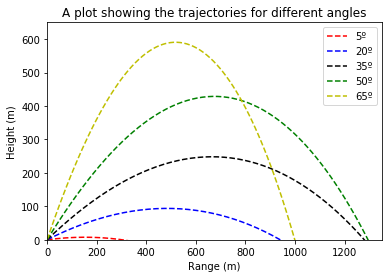

In [143]:
n_steps = 1000
thetas = range(5, 90, 15) # the angles in degrees
colours = ['r', 'b', 'k', 'g', 'y', 'r']
for i in range(0, len(thetas)-1):
    initial_conditions = [0, 0, 125*numpy.cos(thetas[i]*numpy.pi/180), 125*numpy.sin(thetas[i]*numpy.pi/180)]    
    values_euler = solve_euler(initial_conditions, 300, n_steps)
    xs_euler, ys_euler = values_euler[:,0], values_euler[:,1]
    plt.plot(xs_euler, ys_euler, color= colours[i], linestyle='--', label = "{}{}".format(thetas[i], 'º'))
plt.xlabel('Range (m)')
plt.ylabel('Height (m)')
plt.title('A plot showing the trajectories for different angles')
plt.xlim(0,1350)
plt.ylim(0,650)
plt.legend()

Create a plot to show the range for different values of the initial velocity. Use the same angle $\theta=60^\circ$ for all velocities. The plot should have axis labels and a title and legend. Produce one curve with and one curve without the effect of air resistance. [5 marks]


In [159]:
n_steps = 1000
max_time = 300
v0s = numpy.linspace(50, 1000, 20)

ranges = []
ranges_noresistance = []
theta = numpy.deg2rad(60)

# Your code here
for i in range(0, len(v0s)):
    initial_conditions = [0, 0, v0s[i]*numpy.cos(60*numpy.pi/180), v0s[i]*numpy.sin(60*numpy.pi/180)]    
    values_euler = solve_euler(initial_conditions, max_time, n_steps)
    ranges.append(values_euler[-1][0])

for i in range(0, len(v0s)):
    initial_conditions = [0, 0, v0s[i]*numpy.cos(60*numpy.pi/180), v0s[i]*numpy.sin(60*numpy.pi/180)]
    resistance_conditions = f(initial_conditions, max_time)
    values_euler = solve_euler([initial_conditions[0], initial_conditions[1], resistance_conditions[0], resistance_conditions[1]], max_time, n_steps)
    resistance_ranges.append(values_euler[-1][0])
    
plt.plot(v0s, ranges)
plt.plot(v0s, resistance_ranges)
plt.ylabel('Range (m)')
plt.xlabel('Initial velocity (m/s)')
plt.title('A plot of the range of a projectile against its initial \nvelocity for cases with and without resistance forces')

   

[[ 0.00000000e+00  0.00000000e+00  2.50000000e+01  4.33012702e+01]
 [ 7.50000000e+00  1.29903811e+01  2.49311698e+01  4.02390528e+01]
 [ 1.49793509e+01  2.50620969e+01  2.48661856e+01  3.71911680e+01]
 ...
 [ 9.97004930e+02 -6.43052392e+04  1.62657096e-04 -2.31185568e+02]
 [ 9.97004979e+02 -6.43745949e+04  1.60586465e-04 -2.31185568e+02]
 [ 9.97005027e+02 -6.44439506e+04  1.58542194e-04 -2.31185568e+02]]
[[ 0.00000000e+00  0.00000000e+00  5.00000000e+01  8.66025404e+01]
 [ 1.50000000e+01  2.59807621e+01  4.97246793e+01  8.31826710e+01]
 [ 2.99174038e+01  5.09355634e+01  4.94593303e+01  7.97957778e+01]
 ...
 [ 2.00731622e+03 -6.30855520e+04  3.48264681e-04 -2.31185568e+02]
 [ 2.00731633e+03 -6.31549077e+04  3.43831260e-04 -2.31185568e+02]
 [ 2.00731643e+03 -6.32242633e+04  3.39454277e-04 -2.31185568e+02]]
[[ 0.00000000e+00  0.00000000e+00  7.50000000e+01  1.29903811e+02]
 [ 2.25000000e+01  3.89711432e+01  7.43805285e+01  1.25887854e+02]
 [ 4.48141585e+01  7.67374995e+01  7.37816563e+01 

NameError: name 'resistance_ranges' is not defined